L模式的像素值：=========================================================================================


测试数据的维度： (28, 28, 1)
模型概括:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 32)        4640      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1568)              0   

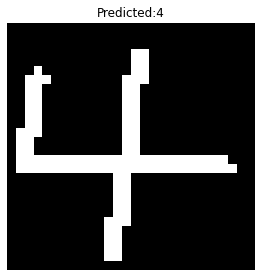

In [9]:
# -*- coding: utf-8 -*-

from keras.preprocessing import image     #导入numpy、matplotlib、keras、cv2
import numpy as np
from keras.models import load_model
import cv2
from matplotlib import pyplot as plt

img_path = "./4-1.png"                                  #测试图片路径
img = image.load_img(img_path,target_size=(28,28))      #kreas加载测试图片,并reshape
img = img.convert('L')                                  #测试图片转为灰度值
#为灰色图像，它的每个像素用8个bit表示，0表示黑，255表示白，其他数字表示不同的灰度。
#在PIL中，从模式“RGB”转换为“L”模式是按照下面的公式转换的： L = R * 299/1000 + G * 587/1000+ B * 114/1000

print("L模式的像素值：=========================================================================================")
'''
for i in range(28):                     #按行写入图片像素到目的文件中
    for j in range(28):
        pixel_r = int(img.getpixel((j,i)))    #每一个像素为4Byte  int型
        print(pixel_r,end=' ')
    print("\n")
print("\n")
'''
print("\n")
x = image.img_to_array(img)             #图像数据转为数组
print("测试数据的维度：",x.shape)                          #打印图像的维度尺寸
x = np.expand_dims(x, axis=0)           #图像周围补0
x=x.astype('float32')/255.              #图像像素归一化
#print(x)
 #加载模型
model = load_model('./model1.h5')    
# 1、模型概括打印
print("模型概括:")  
model.summary()
#获取网络层数
print("网络层数:",len(model.layers))
#获取每一层的名称
print("网络每一层的名称：",model.layers)

preds = model.predict(x)   #模型测试
#print(preds)               #打印测试结果
n_examples=1
plt.figure(figsize=(10,10))
for i in range (n_examples):
    ax=plt.subplot(2,n_examples,i+1)
    plt.imshow(x[i, :, :, 0],cmap='gray')
    plt.title("Predicted:{}".format(np.argmax(preds[i])))
    plt.axis('off')    
plt.show()